### Advanced regression, Nonlinear regression, Gradient Descent
Using the data set from yesterday’s homework find the best fit parameters a, b,c, d to fit the function y = a + b cos(cx + d) to the data.   
Compare your results to the polynomial fit. What is the mean squared error of your fit?

In [1]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pandas as pd

df = pd.read_csv('regression-data-set.csv')

#### (a) Do a train/test split

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.x, df.y, test_size=.2)

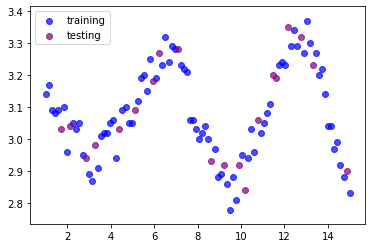

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color='blue',   label='training', alpha=.7)
plt.scatter(X_test,  y_test,  color='purple', label='testing',  alpha=.7)
plt.legend()
plt.show()

In [4]:
print('Training set:', X_train.size, y_train.size)
print('Testing set: ', X_test.size,  y_test.size)

Training set: 80 80
Testing set:  20 20


#### (b) Fit the data using the training set and scipy.optimize.curve_fit
#### (c) Calculate the MSE with the optimized parameters on the test set

In [5]:
""" Function splits the dataset in training, testing sets and fit the training set
    Return the mean squared error of the predictions and the true values of y in the dataframe
    X, y: the predictor and the label of the dataframe
"""
def split_and_fit(X, y):
    # Split the dataset in 2 parts training:testing = 4:1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
    
    # Fit the training set with the fitted_function
    [a, b, c, d], _ = curve_fit(fit_function, X_train, y_train)
    
    # Predict value of y from (x, fitted_function(x, a, b, c, d))
    y_pred = fit_function(X_test, a, b, c , d)
    
    # Calculate the mean squared error of the prediction
    mse = MSE(y_test, y_pred)
    
    # Return a list of mean squared error, and fit coefficients a, b, c, d
    return [mse, a, b, c, d]

""" Function to fit the data point x
    Return evaluated value of the function at given x
    a, b, c, d: predefined coefficients of the function
"""
def fit_function(x, a, b, c, d):
    return a + b * np.cos(c * x + d)

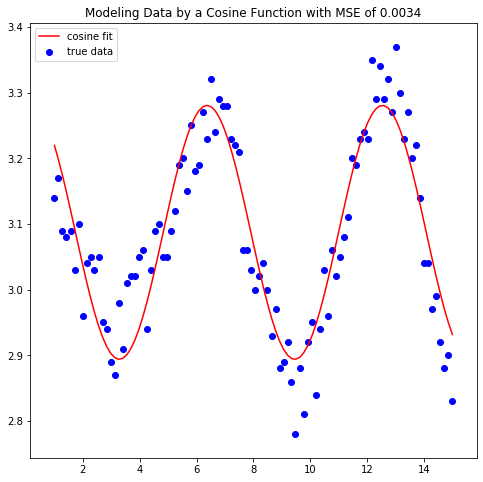

In [6]:
# Fit the training data and predict data th testing data then compute the MSE
params_list = split_and_fit(df.x, df.y)

# Extract the coefficients of the fit function a, b, c, d
a1, b1 = params_list[1], params_list[2]
c1, d1 = params_list[3], params_list[4]

# Generate a list of x-coordinates of data points
x1 = np.linspace(df.x.min(), df.x.max(), len(df))

# Compute a list of y-coordinates using the fit function and the extracted coefficients
y1 = fit_function(x1, a1, b1, c1, d1)

# Plot the fit data points
plt.plot(x1, y1, color='red', label='cosine fit')
plt.scatter(df.x, df.y, color='blue', label='true data')
plt.title('Modeling Data by a Cosine Function with MSE of {:.4f}'.format(params_list[0]))
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

#### (d) Repeat, over, say, 100 iterations, and calculate the mean and standard deviation of the MSE.

In [7]:
n_iterations  = 100
params_list_n = []

for k in range(n_iterations):
    params_list_n.append(split_and_fit(df.x, df.y))

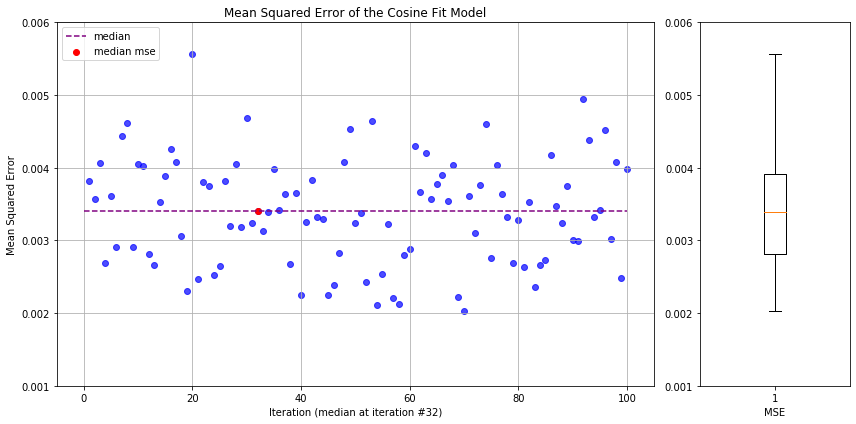

In [8]:
x2 = list(range(1, 101))

# Extract the list of mean squared error
y2 = [params_list_n[k - 1][0] for k in x2]

# Find the index of the median in the mean squared error list
mse_median_index = np.argsort(y2)[len(y2) // 2]
mse_median = y2[mse_median_index]
mse_mean, mse_std = np.mean(np.array(y2)), np.std(np.array(y2))

# Find the coefficients coresponding to the the lowest mean squared error in the list
a2, b2 = params_list_n[mse_median_index][1], params_list_n[mse_median_index][2]
c2, d2 = params_list_n[mse_median_index][3], params_list_n[mse_median_index][4]

fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax0 = plt.subplot(gs[0])
ax0.scatter(x2, y2, color='blue', alpha=.7)
ax0.scatter(mse_median_index + 1, y2[mse_median_index], color='red', label='median mse')
ax0.plot([min(x2) - 1 , max(x2)], [mse_median, mse_median], color='purple', linestyle='dashed', label='median')
ax0.set_xlabel('Iteration (median at iteration #{})'.format(mse_median_index + 1))
ax0.set_ylabel('Mean Squared Error')
ax0.set_title('Mean Squared Error of the Cosine Fit Model')
ax0.legend(loc='upper left')
ax0.set_ylim(.001, .006)
ax0.grid()
ax1 = plt.subplot(gs[1], sharey=ax0)
ax1.boxplot(y2)
ax1.set_xlabel('MSE')
fig.tight_layout()
plt.show()

In [9]:
print('The cosine fit MSE has mean = {:.4f}, median = {:.4f}, standard deviation = {:.4f}'.\
       format(mse_mean, mse_median, mse_std))

The cosine fit MSE has mean = 0.0034, median = 0.0034, standard deviation = 0.0007


#### (e) Compare the results on a single plot

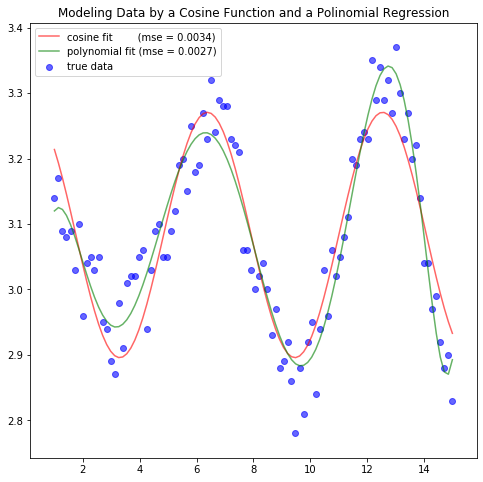

In [10]:
# Generate a list of x-coordinates of data points
x3 = np.linspace(df.x.min(), df.x.max(), len(df))

# Compute a list of y-coordinates using the fit function and the extracted coefficients
y3 = fit_function(x3, a2, b2, c2, d2)

# Read the polynomial regression data from the previous homework to plot the best-fit line
df_poly_fit = pd.read_csv('poly_fit.csv')

# Copy the mean squared error of the best-fit line from the previous homework
mean_polyfit = 0.0027

# Plot the best fit lines for both polynomial regression and cosine fit function
plt.plot(x3, y3, color='red', 
         label='cosine fit        (mse = {:.4f})'.format(mse_median), alpha=.6)
plt.plot(df_poly_fit.x, df_poly_fit.y, color='green', 
         label='polynomial fit (mse = {})'.format(mean_polyfit), alpha=.6)
plt.scatter(df.x, df.y, color='blue', label='true data', alpha=.6)
plt.title('Modeling Data by a Cosine Function and a Polinomial Regression')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

#### Conclusion
Both cosine fit and polynomial regression produce good description of the data with comparable mean squared errors as shown in the plot.    

Several runs showed that the cosin fit model better presents the data for x < 8 while the polynomial regression counterpart outperformed it for x > 8.